In [1]:
!pip install -q xgboost

In [2]:
# Importação de pacotes
import pickle  # Para serialização de objetos
import sklearn as sk  # Biblioteca de aprendizado de máquina
import pandas as pd  # Manipulação de dados
import numpy as np  # Operações numéricas
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações gráficas

# Importação do XGBoost
import xgboost as xgb
from xgboost import XGBClassifier  # Classificador específico do XGBoost

# Algoritmos de classificação do scikit-learn
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.naive_bayes import GaussianNB  # Classificador Naive Bayes

# Pré-processamento e validação
from sklearn.preprocessing import StandardScaler  # Padronização dos dados
from sklearn.model_selection import cross_val_score, GridSearchCV  # Validação cruzada e busca em grade

# Métricas de avaliação
from sklearn.metrics import (
    roc_auc_score,  # Área sob a curva ROC
    accuracy_score,  # Precisão
    precision_score,  # Precisão das previsões
    recall_score,  # Recall
    roc_curve,  # Curva ROC
)

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Exibir gráficos inline (recomendado para notebooks Jupyter)
%matplotlib inline


In [3]:
#Carregando os dados
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')

In [4]:
#Tamanho do Dataset
df.shape

(6362620, 11)

In [5]:
#Visualizar registros
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Resumo estatístico
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
print("Número de colunas:", len(df.columns))

Número de colunas: 11


In [8]:
# Verificando valores ausentes
df.isnull().sum().sum()

0

In [9]:
#Esta função calcula a prevalência da classe positiva (label = 1)
def calcula_prevalencia(y_actual): # Corrected the argument name to y_actual
  return sum(y_actual == 1) / len(y_actual)

In [10]:
print("Prevalência da classe positiva: %.3f"% calcula_prevalencia(df["isFraud"].values))


Prevalência da classe positiva: 0.001


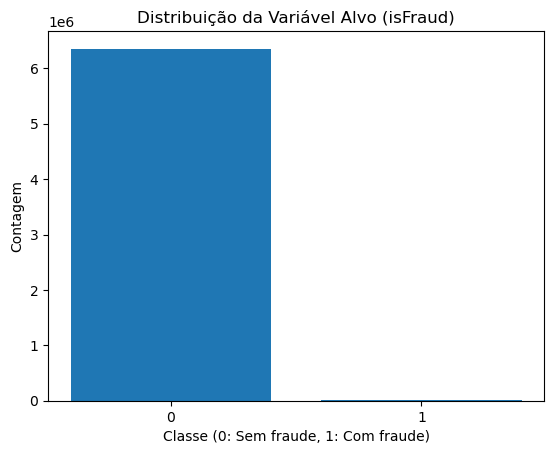

In [11]:
# Contar a distribuição dos valores da variável alvo
contagem_alvo = df['isFraud'].value_counts()

# Criar gráfico de barras
plt.bar(contagem_alvo.index.astype(str), contagem_alvo.values)

# Adicionar título e rótulos
plt.title('Distribuição da Variável Alvo (isFraud)')
plt.xlabel('Classe (0: Sem fraude, 1: Com fraude)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [12]:
# Contar quantos valores são 1 na variável 'Alvo'
quantidade_1 = df['isFraud'].sum()

# Exibir o resultado
print(f'Quantidade de valores 1 (com fraude): {quantidade_1}')

Quantidade de valores 1 (com fraude): 8213


In [13]:
#valores distindos de smoking_history e gender

# Obter valores distintos (únicos) da coluna 'type'
valores_distintos_type = df['type'].unique()

# Obter valores distintos (únicos) da coluna 'nameOrig'
valores_distintos_nameOrig = df['nameOrig'].unique()

# Obter valores distintos (únicos) da coluna 'nameDest'
valores_distintos_nameDest = df['nameDest'].unique()

# Exibir os resultados
print("Valores distintos em 'type':", valores_distintos_type)
print("Valores distintos em 'nameOrig':", valores_distintos_nameOrig)
print("Valores distintos em 'nameDest':", valores_distintos_nameDest)

Valores distintos em 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Valores distintos em 'nameOrig': ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
Valores distintos em 'nameDest': ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Codificação por Rótulos para a coluna 'type'
le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])

# Codificação por Frequência para as colunas 'nameOrig' e 'nameDest'
df['nameOrig'] = df['nameOrig'].map(df['nameOrig'].value_counts())
df['nameDest'] = df['nameDest'].map(df['nameDest'].value_counts())

# Exibir o DataFrame final
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,1,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,1,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,1,181.00,0.00,44,0.00,0.00,1,0
3,1,1,181.00,1,181.00,0.00,41,21182.00,0.00,1,0
4,1,3,11668.14,1,41554.00,29885.86,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,1,339682.13,0.00,2,0.00,339682.13,1,0
6362616,743,4,6311409.28,1,6311409.28,0.00,1,0.00,0.00,1,0
6362617,743,1,6311409.28,1,6311409.28,0.00,3,68488.84,6379898.11,1,0
6362618,743,4,850002.52,1,850002.52,0.00,1,0.00,0.00,1,0


In [16]:
df.dtypes

step                int64
type                int32
amount            float64
nameOrig            int64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [35]:
# Reorganizar as colunas para que 'nameOrig_freq' e 'nameDest_freq' fiquem no final
colunas = [col for col in df.columns if col not in ['isFraud']]  # Excluir as colunas especificadas
df = df[colunas + ['isFraud']]  # Adicionar as colunas no final

# Exibir o DataFrame reorganizado
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9839.64,1,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,1,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,1,181.00,0.00,44,0.00,0.00,0,1
3,1,1,181.00,1,181.00,0.00,41,21182.00,0.00,0,1
4,1,3,11668.14,1,41554.00,29885.86,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,1,339682.13,0.00,2,0.00,339682.13,0,1
6362616,743,4,6311409.28,1,6311409.28,0.00,1,0.00,0.00,0,1
6362617,743,1,6311409.28,1,6311409.28,0.00,3,68488.84,6379898.11,0,1
6362618,743,4,850002.52,1,850002.52,0.00,1,0.00,0.00,0,1


In [37]:
# Preparando o dataset somente com os dados de interesse
collist = df.columns.tolist()
cols_input = collist[0:10]
df_data = df[cols_input + ["isFraud"]]

In [38]:
cols_input

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

In [39]:
df_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9839.64,1,170136.00,160296.36,1,0.00,0.00,0,0
1,1,3,1864.28,1,21249.00,19384.72,1,0.00,0.00,0,0
2,1,4,181.00,1,181.00,0.00,44,0.00,0.00,0,1
3,1,1,181.00,1,181.00,0.00,41,21182.00,0.00,0,1
4,1,3,11668.14,1,41554.00,29885.86,1,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,1,339682.13,0.00,2,0.00,339682.13,0,1
6362616,743,4,6311409.28,1,6311409.28,0.00,1,0.00,0.00,0,1
6362617,743,1,6311409.28,1,6311409.28,0.00,3,68488.84,6379898.11,0,1
6362618,743,4,850002.52,1,850002.52,0.00,1,0.00,0.00,0,1


In [40]:
# Checando se temos colunas duplicadas nos dados de entrada
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "há colunas duplicadas"

set()


In [41]:
# Checando se temos colunas duplicadas no dataset final
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "há colunas duplicadas"

set()


## Etapa 6 - Divisão dos Dados em Treino, Validação e Teste

In [42]:
# Gerando amostras aleatórias dos dados
df_data = df_data.sample(n = len(df_data))

In [43]:
# Ajustando os índices do dataset
df_data = df_data.reset_index(drop = True)

In [44]:
# Gera um índice para a divisão
df_valid_teste = df_data.sample(frac = 0.3)
print("Tamanho da divisão de validação / teste: %.1f" % (len(df_valid_teste) / len(df_data)))

Tamanho da divisão de validação / teste: 0.3


In [45]:
# Fazendo a divisão 70/15/15

# Dados de teste
df_teste = df_valid_teste.sample(frac = 0.5)

# Dados se validação
df_valid = df_valid_teste.drop(df_teste.index)

# Dados de treino
df_treino = df_data.drop(df_valid_teste.index)

In [46]:
# Verifique a prevalência de cada subconjunto
print("Teste(n = %d): %.3f" % (len(df_teste), calcula_prevalencia(df_teste.isFraud.values)))
print("Validação(n = %d): %.3f" % (len(df_valid), calcula_prevalencia(df_valid.isFraud.values)))
print("Treino(n = %d): %.3f" % (len(df_treino), calcula_prevalencia(df_treino.isFraud.values)))

Teste(n = 954393): 0.001
Validação(n = 954393): 0.001
Treino(n = 4453834): 0.001


In [47]:
print('Todas as amostras (n = %d)'%len(df_data))
assert len(df_data) == (len(df_teste) + len(df_valid) + len(df_treino)), 'algo saiu errado'

Todas as amostras (n = 6362620)


## Etapa 7 - Balanceamento de Classe

Aplicamos balanceamento de classe somente nos dados de treino.

In [48]:
# Cria um índice
rows_pos = df_treino.isFraud == 1

In [49]:
# Define valores positivos e negativos do índice
df_train_pos = df_treino.loc[rows_pos]
df_train_neg = df_treino.loc[~rows_pos]

In [50]:
# Valor mínimo
n = np.min([len(df_train_pos), len(df_train_neg)])

In [51]:
# Obtém valores aleatórios para o dataset de treino
df_treino_final = pd.concat([df_train_pos.sample(n = n, random_state = 64),
                             df_train_neg.sample(n = n, random_state = 64)],
                            axis = 0,
                            ignore_index = True)

In [52]:
# Amostragem
df_treino_final = df_treino_final.sample(n = len(df_treino_final), random_state = 64).reset_index(drop = True)

In [54]:
print('Balanceamento em Treino(n = %d): %.3f'%(len(df_treino_final),
                                               calcula_prevalencia(df_treino_final.isFraud.values)))

Balanceamento em Treino(n = 11402): 0.500


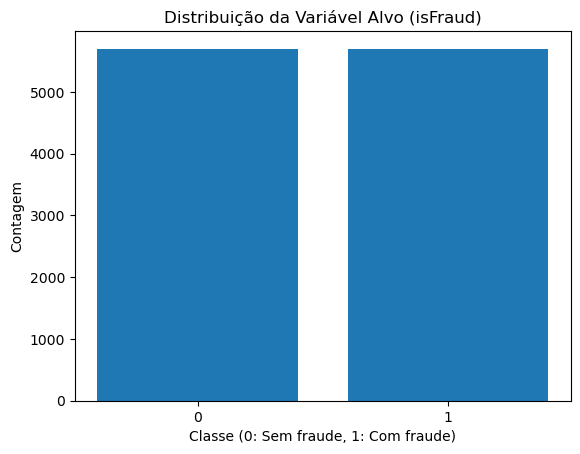

In [55]:
# Contar a distribuição dos valores da variável alvo
contagem_alvo = df_treino_final['isFraud'].value_counts()

# Criar gráfico de barras
plt.bar(contagem_alvo.index.astype(str), contagem_alvo.values)

# Adicionar título e rótulos
plt.title('Distribuição da Variável Alvo (isFraud)')
plt.xlabel('Classe (0: Sem fraude, 1: Com fraude)')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

In [56]:
# Salvamos todos os datasets em disco no formato csv.
df_treino.to_csv('dados_treino.csv', index = False)
df_treino_final.to_csv('dados_treino_final.csv', index = False)
df_valid.to_csv('dados_valid.csv', index = False)
df_teste.to_csv('dados_teste.csv', index = False)

In [57]:
# Salvamos os dados de entrada (colunas preditoras) para facilitar a utilização mais tarde
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

> Criamos as Matrizes X e Y.

In [58]:
# X
X_treino = df_treino_final[cols_input].values
X_valid = df_valid[cols_input].values

In [60]:
# Y
y_treino = df_treino_final['isFraud'].values
y_valid = df_valid['isFraud'].values

In [61]:
# Print
print('Shape dos dados de treino:', X_treino.shape, y_treino.shape)
print('Shape dos dados de validação:', X_valid.shape, y_valid.shape)

Shape dos dados de treino: (11402, 10) (11402,)
Shape dos dados de validação: (954393, 10) (954393,)


# Padronização

In [62]:
# Cria o objeto
scaler = StandardScaler()

In [63]:
# Faz o fit
scaler.fit(X_treino)

StandardScaler()

In [64]:
# Salva o objeto em disco e carrega para usamos adiante
scalerfile = 'scaler.sav'

In [65]:
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

In [66]:
# Aplica a padronização em nossas matrizes de dados
X_treino_tf = scaler.transform(X_treino)
X_valid_tf = scaler.transform(X_valid)

In [67]:
X_treino_tf

array([[-1.34531852,  0.61287717, -0.43881443, ..., -0.23684658,
        -0.32035428, -0.03107531],
       [ 0.46431401, -0.74204779, -0.38102403, ..., -0.22034807,
        -0.27804996, -0.03107531],
       [-0.85553194, -0.74204779, -0.29039665, ...,  1.53035326,
         1.32486249, -0.03107531],
       ...,
       [-0.3812123 , -1.41951028, -0.26692879, ...,  0.22313668,
         0.00781913, -0.03107531],
       [-1.24220555,  1.29033965,  0.07266775, ..., -0.23684658,
        -0.32035428, -0.03107531],
       [ 0.01061696,  0.61287717, -0.43788774, ..., -0.23684658,
        -0.32035428, -0.03107531]])

# Modelagem Preditiva

In [69]:
# Função para calcular a especificidade
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual ==0)

In [70]:
# Função para gerar relatório de métricas
def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)

    accuracy = accuracy_score(y_actual, (y_pred > thresh))

    recall = recall_score(y_actual, (y_pred > thresh))

    precision = precision_score(y_actual, (y_pred > thresh))

    specificity = calc_specificity(y_actual, y_pred, thresh)

    print('AUC:%.3f'%auc)
    print('Acurácia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')

    return auc, accuracy, recall, precision, specificity

In [71]:
thresh = 0.5

### Versão 1  - Modelos Lineares Regressão Logistica

In [72]:
# Construção do modelo

# Cria o classificador (objeto)
lr = LogisticRegression(max_iter = 500, random_state = 142)

# Treina e cria o modelo
modelo_dsa_v1 = lr.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_dsa_v1.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_dsa_v1.predict_proba(X_valid_tf)[:,1]

print('\nRegressão Logística\n')

print('Treinamento:\n')
v1_train_auc, v1_train_acc, v1_train_rec, v1_train_prec, v1_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v1_valid_auc, v1_valid_acc, v1_valid_rec, v1_valid_prec, v1_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Regressão Logística

Treinamento:

AUC:0.958
Acurácia:0.890
Recall:0.820
Precisão:0.953
Especificidade:0.960
 
Validação:

AUC:0.955
Acurácia:0.957
Recall:0.826
Precisão:0.024
Especificidade:0.957
 


### Versão 2  - Modelos Probabilísticos Gaussian Naive Bayes

In [73]:
# Construção do modelo

# Cria o classificador (objeto)
nb = GaussianNB()

# Treina e cria o modelo
modelo_dsa_v2 = nb.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_dsa_v2.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_dsa_v2.predict_proba(X_valid_tf)[:,1]

print('\nNaive Bayes\n')

print('Treinamento:\n')
v2_train_auc, v2_train_acc, v2_train_rec, v2_train_prec, v2_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v2_valid_auc, v2_valid_acc, v2_valid_rec, v2_valid_prec, v2_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Naive Bayes

Treinamento:

AUC:0.828
Acurácia:0.571
Recall:0.149
Precisão:0.950
Especificidade:0.992
 
Validação:

AUC:0.823
Acurácia:0.990
Recall:0.130
Precisão:0.019
Especificidade:0.991
 


### Versão 3  - Modelos de Árvore de Decisão e Boosting

In [74]:
# Construção do modelo

# Cria o classificador
xgbc = XGBClassifier()

# Treina e cria o modelo
modelo_dsa_v3 = xgbc.fit(X_treino_tf, y_treino)

# Previsões
y_train_preds = modelo_dsa_v3.predict_proba(X_treino_tf)[:,1]
y_valid_preds = modelo_dsa_v3.predict_proba(X_valid_tf)[:,1]

print('\nXtreme Gradient Boosting Classifier\n')

print('Treinamento:\n')
v3_train_auc, v3_train_acc, v3_train_rec, v3_train_prec, v3_train_spec = print_report(y_treino,
                                                                                          y_train_preds,
                                                                                          thresh)

print('Validação:\n')
v3_valid_auc, v3_valid_acc, v3_valid_rec, v3_valid_prec, v3_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds,
                                                                                          thresh)


Xtreme Gradient Boosting Classifier

Treinamento:

AUC:1.000
Acurácia:1.000
Recall:1.000
Precisão:1.000
Especificidade:1.000
 
Validação:

AUC:0.999
Acurácia:0.990
Recall:0.998
Precisão:0.112
Especificidade:0.990
 


# Validação cruzada

In [75]:
# Cria o classificador
xgbc = XGBClassifier()

# Configura a validação cruzada
# Por exemplo, usando 5 divisões e a métrica de área sob a curva ROC (AUC)
n_splits = 5
score = 'roc_auc'

# Realiza a validação cruzada
cv_scores = cross_val_score(xgbc, X_treino_tf, y_treino, cv = n_splits, scoring = score)

# Exibe os resultados
print(f"Validação Cruzada com {n_splits} divisões")
print(f"Score AUC em Cada Divisão: {cv_scores}")
print(f"Média de Score AUC: {np.mean(cv_scores)}")

Validação Cruzada com 5 divisões
Score AUC em Cada Divisão: [0.99974937 0.99785276 0.99847953 0.99972068 0.99886196]
Média de Score AUC: 0.9989328614292162


# Otimização de Hiperparâmetros com GridSearchCV

In [76]:
%%time

# Define o classificador
xgbc = XGBClassifier()

# Define o espaço de hiperparâmetros para a otimização
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Configura o GridSearchCV
grid_search = GridSearchCV(xgbc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)

# Realiza a busca pelos melhores hiperparâmetros
grid_search.fit(X_treino_tf, y_treino)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Treina o modelo com os melhores hiperparâmetros
modelo_dsa_v4 = grid_search.best_estimator_

# Previsões com o modelo otimizado
y_train_preds_optimized = modelo_dsa_v4.predict_proba(X_treino_tf)[:,1]
y_valid_preds_optimized = modelo_dsa_v4.predict_proba(X_valid_tf)[:,1]

# Avaliação do modelo otimizado
print('\nXtreme Gradient Boosting Classifier - Otimizado\n')
print('Melhores hiperparâmetros:', best_params)

print('\nTreinamento:\n')
v4_train_auc, v4_train_acc, v4_train_rec, v4_train_prec, v4_train_spec = print_report(y_treino,
                                                                                          y_train_preds_optimized,
                                                                                          thresh)

print('Validação:\n')
v4_valid_auc, v4_valid_acc, v4_valid_rec, v4_valid_prec, v4_valid_spec = print_report(y_valid,
                                                                                          y_valid_preds_optimized,
                                                                                          thresh)


Xtreme Gradient Boosting Classifier - Otimizado

Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}

Treinamento:

AUC:1.000
Acurácia:0.996
Recall:0.998
Precisão:0.995
Especificidade:0.995
 
Validação:

AUC:0.999
Acurácia:0.989
Recall:0.998
Precisão:0.103
Especificidade:0.989
 
Wall time: 53.2 s


## Etapa 12 - Seleção do Melhor Modelo de Machine Learning

**Vamos criar um dataframe com todos os resultados e plotar usando o seaborn.**

In [77]:
# Cria um dataframe com as métricas calculadas
df_results = pd.DataFrame({'classificador':['RL','RL','NB','NB','XGB','XGB','XGB_O','XGB_O'],
                           'data_set':['treino','validação'] * 4,
                           'auc':[v1_train_auc,
                                  v1_valid_auc,
                                  v2_train_auc,
                                  v2_valid_auc,
                                  v3_train_auc,
                                  v3_valid_auc,
                                  v4_train_auc,
                                  v4_valid_auc],
                           'accuracy':[v1_train_acc,
                                       v1_valid_acc,
                                       v2_train_acc,
                                       v2_valid_acc,
                                       v3_train_acc,
                                       v3_valid_acc,
                                       v4_train_acc,
                                       v4_valid_acc],
                           'recall':[v1_train_rec,
                                     v1_valid_rec,
                                     v2_train_rec,
                                     v2_valid_rec,
                                     v3_train_rec,
                                     v3_valid_rec,
                                     v4_train_rec,
                                     v4_valid_rec],
                           'precision':[v1_train_prec,
                                        v1_valid_prec,
                                        v2_train_prec,
                                        v2_valid_prec,
                                        v3_train_prec,
                                        v3_valid_prec,
                                        v4_train_prec,
                                        v4_valid_prec],
                           'specificity':[v1_train_spec,
                                          v1_valid_spec,
                                          v2_train_spec,
                                          v2_valid_spec,
                                          v3_train_spec,
                                          v3_valid_spec,
                                          v4_train_spec,
                                          v4_valid_spec]})

A métrica de desempenho escolhida será a pontuação AUC (AUC Score) do conjunto de validação. É a pontuação ideal para comparar modelos de algoritmos diferentes.

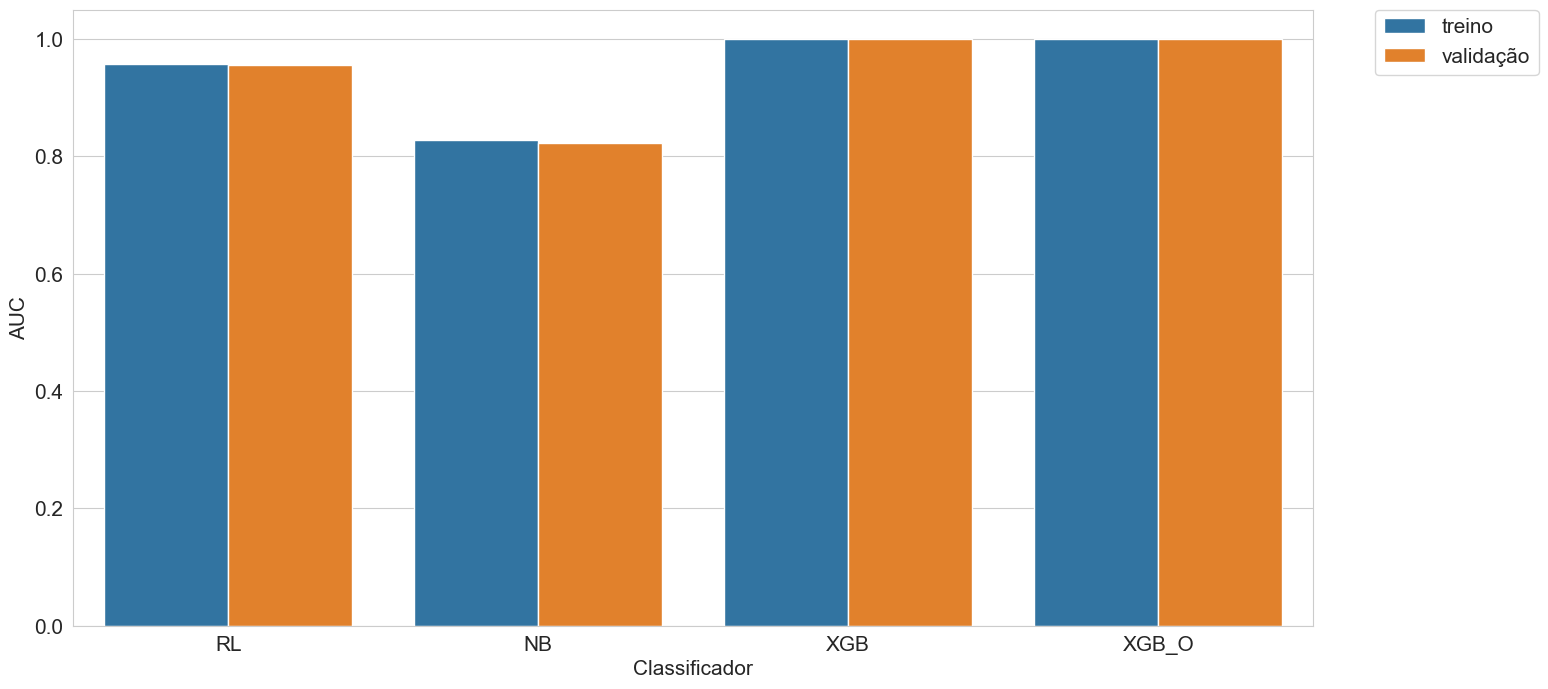

In [78]:
# Construção do Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classificador', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classificador', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.show();

In [79]:
# Tabela de comparação dos modelos
df_results

,classificador,data_set,auc,accuracy,recall,precision,specificity
0,RL,treino,0.957517,0.889844,0.819856,0.953294,0.959832
1,RL,validação,0.955049,0.957014,0.825911,0.024384,0.957183
2,NB,treino,0.827628,0.570514,0.148921,0.949664,0.992107
3,NB,validação,0.823324,0.990170,0.129555,0.018897,0.991285
4,XGB,treino,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGB,validação,0.999464,0.989745,0.998381,0.111908,0.989734
6,XGB_O,treino,0.999956,0.996492,0.998246,0.994756,0.994738
7,XGB_O,validação,0.999481,0.988709,0.998381,0.102690,0.988697


In [80]:
# Tabela de comparação dos modelos somente com métricas em validação e ordenado por AUC
df_results[df_results['data_set'] == 'validação'].sort_values(by = 'auc', ascending = False)

,classificador,data_set,auc,accuracy,recall,precision,specificity
7,XGB_O,validação,0.999481,0.988709,0.998381,0.102690,0.988697
5,XGB,validação,0.999464,0.989745,0.998381,0.111908,0.989734
1,RL,validação,0.955049,0.957014,0.825911,0.024384,0.957183
3,NB,validação,0.823324,0.990170,0.129555,0.018897,0.991285


In [81]:
# Grava o modelo em disco
pickle.dump(modelo_dsa_v4, open('melhor_modelo_dsa.pkl', 'wb'), protocol = 4)

Avaliação e Interpretação das Métricas

In [84]:
# Carrega o modelo, as colunas e o scaler
melhor_modelo = pickle.load(open('melhor_modelo_dsa.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# Carrega os dados
df_train = pd.read_csv('dados_treino.csv')
df_valid= pd.read_csv('dados_valid.csv')
df_test= pd.read_csv('dados_teste.csv')

# Cria matrizes x e y

# X
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

# Y
y_train = df_train['isFraud'].values
y_valid = df_valid['isFraud'].values
y_test = df_test['isFraud'].values

# Aplica a transformação nos dados
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

> Calculando as previsões no formato de probabilidades.

In [85]:
# Calcula as probabilidades
y_train_preds = melhor_modelo.predict_proba(X_train_tf)[:,1]
y_valid_preds = melhor_modelo.predict_proba(X_valid_tf)[:,1]
y_test_preds = melhor_modelo.predict_proba(X_test_tf)[:,1]

> Avaliação de desempenho.

In [86]:
thresh = 0.5

print('\nTreinamento:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,
                                                                                               y_train_preds,
                                                                                               thresh)

print('\nValidação:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,
                                                                                               y_valid_preds,
                                                                                               thresh)

print('\nTeste:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,
                                                                                          y_test_preds,
                                                                                          thresh)


Treinamento:

AUC:1.000
Acurácia:0.989
Recall:0.998
Precisão:0.103
Especificidade:0.989
 

Validação:

AUC:0.999
Acurácia:0.989
Recall:0.998
Precisão:0.103
Especificidade:0.989
 

Teste:

AUC:0.999
Acurácia:0.989
Recall:0.996
Precisão:0.107
Especificidade:0.989
 


> Curva ROC.

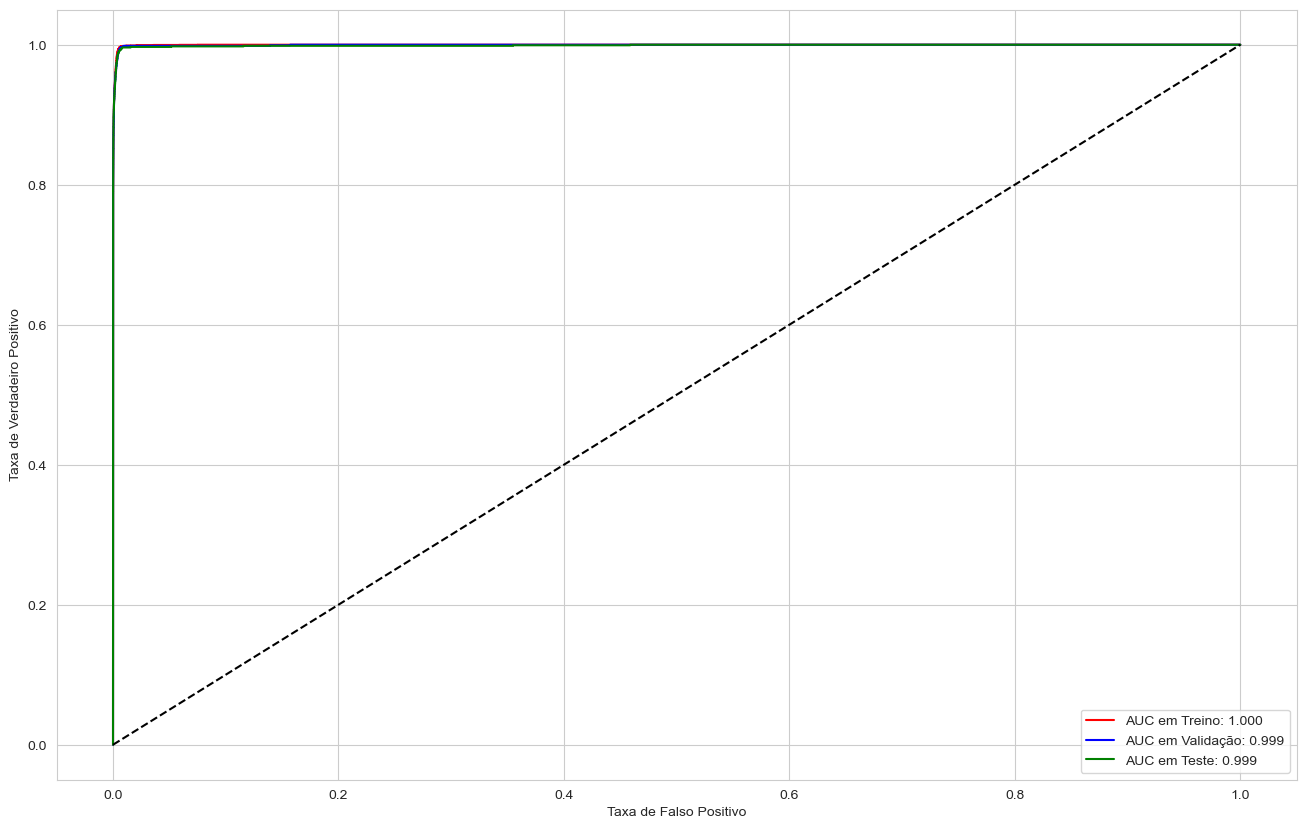

In [87]:
# Calcula a curva ROC nos dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# Calcula a curva ROC nos dados de validação
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# Calcula a curva ROC nos dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC em Treino: %.3f' % auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC em Validação: %.3f' % auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC em Teste: %.3f' % auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend()
plt.show()